In [35]:
import numpy as np
import matplotlib.pyplot as plt
from agent import Agent

In [36]:
layers = 2
n_actions = 30

folder = str(layers)+"L_"+str(n_actions)+"a"+"_LC"
folder = "2L_30a_LC"

times, rcum, pt = np.load(folder+"/run_4/tables/learning_curves.npy")

In [37]:
agent = Agent(layers=layers,n_actions=n_actions)

/home/cooper-cooper/Desktop/marek/agent.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.q_table = np.array(self.q_table)
/home/cooper-cooper/Desktop/marek/agent.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.n_table = np.array(self.n_table)


In [38]:
o_ep = np.load("resultsdp/0.01/objective_function.npy")
o_clean = np.load("resultsdp/1/objective_function.npy")
o_avg = np.load("resultsdp/0.01_avg/objective_function.npy")

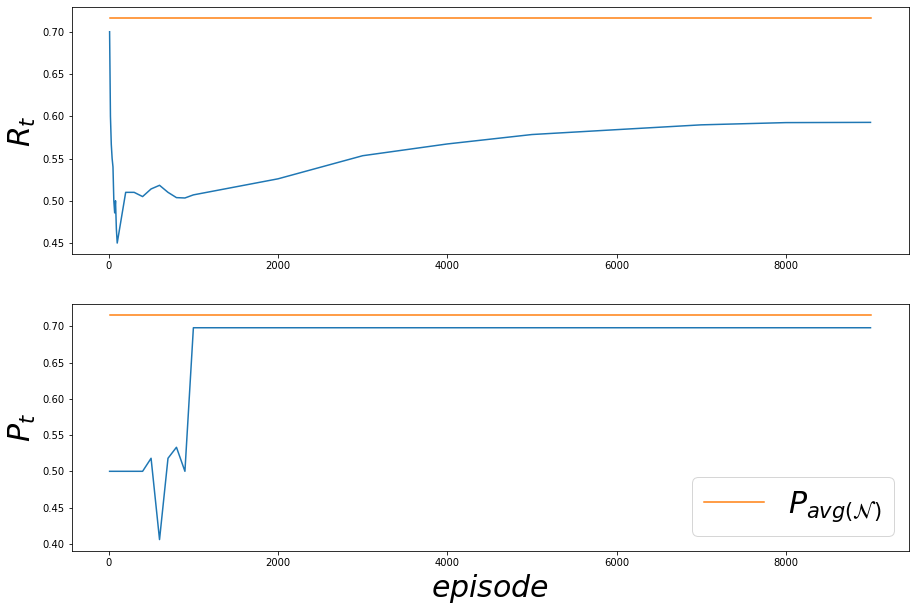

In [39]:
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.plot(times, rcum/times)
plt.plot(times, np.ones(len(times))*o_avg[0,0], label=r'$P_{avg(\mathcal{N})}$')

plt.ylabel(r'$R_t$',size=30)
plt.subplot(212)
plt.plot(times,pt)
plt.plot(times, np.ones(len(times))*o_avg[0,0], label=r'$P_{avg(\mathcal{N})}$')
plt.ylabel(r'$P_t$',size=30)
plt.xlabel(r'$episode$',size=30)
plt.legend(prop={"size":30})

In [97]:
%load_ext autoreload
%autoreload 2

import environment

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [122]:
channel = {"class":"compound_lossy", "params":[.5,0.01]}

env = environment.Environment(channel=channel)

In [129]:
env.reset()
env.act_channel()
env.amplitude

0.4